In [15]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#### Paso 2: Definir la fución objetivo f(x)=-[1-(11/2*x-7/2)^2]*[cos(11/2*x-7/2)+1]+2

In [16]:
def objective_function(x):
    return -1*(1-((11/2)*x-(7/2))**2)*(np.cos((11/2)*x-(7/2))+1)+2

#### Paso 3: Inicializar los parámetros del PSO

In [17]:
num_particles = 30
num_dimensions = 1
num_iterations = 100
w=0.5
c1=1.5
c2=2.0

bounds = (-10, 10)
history = []

In [18]:
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

p_best_position = particles.copy()
p_best_values = np.array([objective_function(x) for x in particles])
g_best_position = p_best_position[np.argmax(p_best_values)]
g_best_values = np.max(p_best_values)

particles

array([[ 4.46166992],
       [-9.74010101],
       [-8.97999761],
       [ 8.43433293],
       [ 3.88621852],
       [-6.12681691],
       [ 9.22851417],
       [-4.98026274],
       [-7.69399092],
       [-6.67881037],
       [-7.17425696],
       [-6.2999559 ],
       [ 5.18432656],
       [-8.13968626],
       [ 6.16530448],
       [-5.8823857 ],
       [-9.09751405],
       [-4.77656092],
       [-7.29271062],
       [ 7.80205634],
       [-7.53891819],
       [ 3.69611397],
       [-8.90428873],
       [-5.87018296],
       [ 3.62951585],
       [ 4.63700521],
       [-0.24421992],
       [-9.13901402],
       [ 8.09115193],
       [-9.98574403]])

In [19]:
for t in range(num_iterations):
  for i in range(num_particles):
    fitness = objective_function(particles[i])

    if fitness < p_best_values[i]:
      p_best_values[i] = fitness
      p_best_position[i] = particles[i].copy()

    if fitness < g_best_values:
      g_best_values = fitness
      g_best_position = particles[i].copy()

    for i in range(num_particles):
      r1 = rd.random()
      r2 = rd.random()

      velocities[i] = w*velocities[i] + c1*r1*(p_best_position[i] - particles[i]) + c2*r2*(g_best_position - particles[i])
      particles[i] = particles[i] + velocities[i]

      particles[i] = np.clip(particles[i], bounds[0], bounds[1])

  history.append(particles.copy())
  print(f'Iteration {t+1}/{num_iterations} - Best score: {g_best_values}')

print(f'Best solution: {g_best_position}')
print(f'Best score: {g_best_values}')

Iteration 1/100 - Best score: [2.00623479]
Iteration 2/100 - Best score: [0.01967503]
Iteration 3/100 - Best score: [0.01899688]
Iteration 4/100 - Best score: [0.00053424]
Iteration 5/100 - Best score: [4.14628342e-05]
Iteration 6/100 - Best score: [2.54211344e-06]
Iteration 7/100 - Best score: [2.54211344e-06]
Iteration 8/100 - Best score: [9.54110424e-07]
Iteration 9/100 - Best score: [5.26537358e-08]
Iteration 10/100 - Best score: [1.48511203e-10]
Iteration 11/100 - Best score: [1.4404633e-10]
Iteration 12/100 - Best score: [1.44004364e-10]
Iteration 13/100 - Best score: [1.78657089e-12]
Iteration 14/100 - Best score: [6.79456491e-14]
Iteration 15/100 - Best score: [6.79456491e-14]
Iteration 16/100 - Best score: [6.59472477e-14]
Iteration 17/100 - Best score: [0.]
Iteration 18/100 - Best score: [0.]
Iteration 19/100 - Best score: [0.]
Iteration 20/100 - Best score: [0.]
Iteration 21/100 - Best score: [0.]
Iteration 22/100 - Best score: [0.]
Iteration 23/100 - Best score: [0.]
Iterat

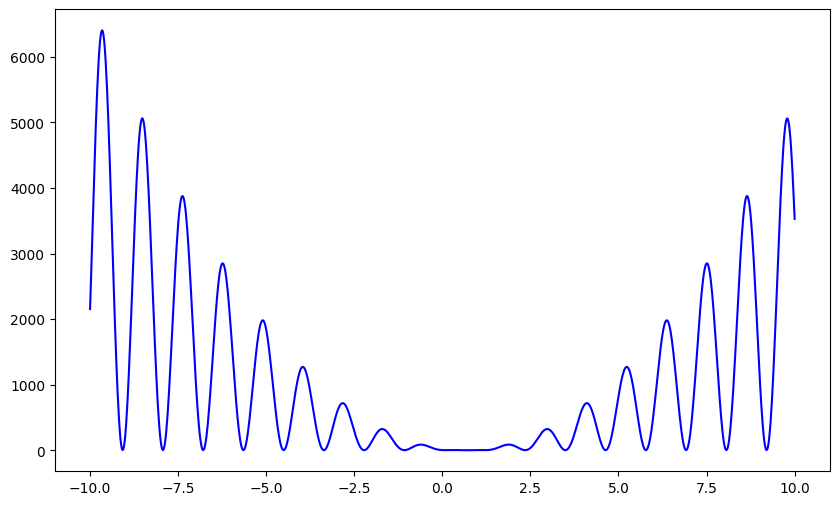

In [20]:
x_value = np.linspace(-10, 10, 1000)
y_value = [objective_function(x) for x in x_value]

plt.figure(figsize=(10, 6))
plt.plot(x_value, y_value, 'b')

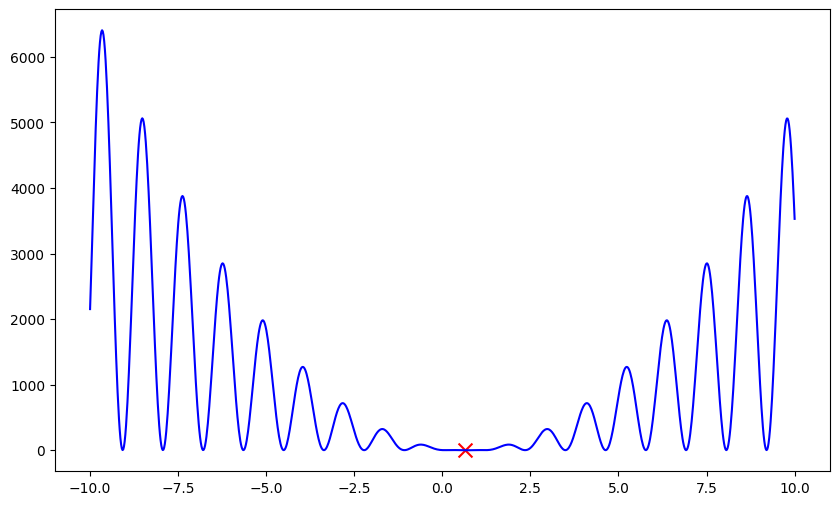

In [21]:
x_values = np.linspace(-10, 10, 1000)
y_values = objective_function(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'b')
plt.scatter((g_best_position), objective_function(g_best_position), color='r', marker='x', s=100)